In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [106]:

lock_gdf = gpd.read_parquet('../fis-export/lock.geoparquet')
route_gdf = gpd.read_parquet('../fis-export/route.geoparquet')
fairway_gdf = gpd.read_parquet('../fis-export/fairway.geoparquet')
chamber_gdf = gpd.read_parquet('../fis-export/chamber.geoparquet')
kilometermark_gdf = gpd.read_parquet('../fis-export/kilometermark.geoparquet')
                                 
isrs_gdf = gpd.read_parquet('../fis-export/isrs.geoparquet')
# isrs_gdf = isrs_gdf.set_index('Code')


In [105]:
# See docs of ISRS https://ienc-kennisportaal.nl/versie/isrs-location-code/
# Some lock complexes consist of multiple ISRS codes
# These are the codes of Eefde
# Sequential locks consist of multiple isrs_locks
# Multiple chambers within one lock are in parallel.
isrs_complex = ["NLEFE000810975700033", "NLEFE000810975500031"]



In [85]:
# G.4.9 Stuw / waterkering (doorvaartopening)
isrs_locks = isrs_gdf.set_index('Code').loc[isrs_complex]
isrs_locks

,Id,GeoType,GeoGeneration,Name,Geometry,CountryCode,FairwayRouteId,Function,Hectometer,ObjectName,SectionNode,TerminalCode,UnLocationCode,PositionCode,geometry
Code,,,,,,,,,,,,,,,
NLEFE000810975700033,9059280,isrs,2340,NLEFE000810975700033,POINT (6.23415579276436 52.1602379628045),NL,00081,lokare,33,Sluis Eefde,2868.0,09757,EFE,None,POINT (6.23416 52.16024)
NLEFE000810975500031,9059276,isrs,2377,NLEFE000810975500031,POINT (6.23080177569731 52.1597537819043),NL,00081,lokare,31,Voorsluis Eefde,2868.0,09755,EFE,None,POINT (6.2308 52.15975)


In [86]:
locks = lock_gdf[lock_gdf['Code'].isin(isrs_locks.index)]
locks

,Id,GeoType,GeoGeneration,Name,Geometry,VinCode,RouteId,RouteKmBegin,RouteKmEnd,City,...,CountryCode,FairwayRouteId,Function,Hectometer,ObjectName,SectionNode,TerminalCode,UnLocationCode,PositionCode,geometry
1799,42751,lock,2374,Voorsluis Eefde,POINT (6.23079299926758 52.1597400064121),9755,11172,3.1,3.070,Eefde,...,NL,00081,lokare,31.0,Voorsluis Eefde,2868.0,09755,EFE,None,POINT (6.23079 52.15974)
2165,50318,lock,2340,Sluis Eefde,POINT (6.23491287231445 52.1605034810675),9757,11172,3.3,3.306,Eefde,...,NL,00081,lokare,33.0,Sluis Eefde,2868.0,09757,EFE,None,POINT (6.23491 52.1605)


In [87]:
chambers = chamber_gdf[chamber_gdf['ParentId'].isin(locks['Id'])]

In [88]:
chambers.T

,95,188,298
Id,22246946,47265,17837
GeoType,chamber,chamber,chamber
GeoGeneration,3248,3179,3179
Name,Noordkolk sluis Eefde,Sluiskolk Voorsluis Eefde,Zuidkolk sluis Eefde
Geometry,"POLYGON ((6.23610671235274 52.1609031555078, 6...","POLYGON ((6.23376339058734 52.1601028455638, 6...","POLYGON ((6.2340357100622 52.1602634574202, 6...."
VinCode,65110612,9756,9758
RouteId,11172,11172,11172
RouteKmBegin,3.3,3.1,3.3
RouteKmEnd,3.358,3.07,3.306
IsrsId,25659468,9059277,9059281


In [119]:
route_ids = set(chambers['RouteId']) | set(locks['RouteId'])
fairway_ids = set(chambers['FairwayId']) | set(locks['FairwayId'])
routes = route_gdf.set_index('Id').loc[list(route_ids)]
kilometermarks = kilometermark_gdf[kilometermark_gdf['FairwayId'].isin(fairway_ids)]
display(kilometermarks)
display(routes)
fairways = fairway_gdf.set_index('Id').loc[list(fairway_ids)]
fairways

,Id,GeoType,GeoGeneration,Name,Geometry,ForeignCode,RouteId,RouteKmBegin,RouteKmEnd,FairwaySectionId,...,CountryCode,FairwayRouteId,Function,Hectometer,ObjectName,SectionNode,TerminalCode,UnLocationCode,PositionCode,geometry
812,40510,kilometermark,1707,kmr 47,POINT (6.82840941769783 52.2397439451329),None,11172,44.550,48.198,10303,...,NL,00081,dismar,470.0,47,2871.0,K0047,ENS,None,POINT (6.82841 52.23974)
813,40539,kilometermark,1707,kmr 37,POINT (6.68597326121707 52.2500333834379),None,11172,34.203,43.745,53172,...,NL,00081,dismar,369.0,37,2869.0,K0037,DEL,None,POINT (6.68597 52.25003)
835,47730,kilometermark,1707,kmr 39,POINT (6.71474115519147 52.2523389988998),None,11172,34.203,43.745,53172,...,NL,00081,dismar,390.0,39,2869.0,K0039,DEL,None,POINT (6.71474 52.25234)
1094,48197,kilometermark,1707,kmr 43,POINT (6.77293871960152 52.2496225973887),None,11172,34.203,43.745,53172,...,NL,00081,dismar,429.0,43,2869.0,K0043,HGL,None,POINT (6.77294 52.24962)
1141,41428,kilometermark,1707,kmr 44,POINT (6.78740022277612 52.2479652973849),None,11172,43.745,44.154,22000,...,NL,00081,dismar,440.0,44,2870.0,K0044,HGL,None,POINT (6.7874 52.24797)
1149,44663,kilometermark,1707,kmr 40,POINT (6.7290290310809 52.2520029858526),None,11172,34.203,43.745,53172,...,NL,00081,dismar,399.0,40,2869.0,K0040,HGL,None,POINT (6.72903 52.252)
1905,1961,kilometermark,1707,kmr 41,POINT (6.74385229164557 52.2514695611832),None,11172,34.203,43.745,53172,...,NL,00081,dismar,410.0,41,2869.0,K0041,HGL,None,POINT (6.74385 52.25147)
1972,5912,kilometermark,1707,kmr 46,POINT (6.8161923428933 52.2445000201821),None,11172,44.550,48.198,10303,...,NL,00081,dismar,460.0,46,2871.0,K0046,HGL,None,POINT (6.81619 52.2445)
2003,8805,kilometermark,1707,kmr 42,POINT (6.75845223086413 52.2509149390073),None,11172,34.203,43.745,53172,...,NL,00081,dismar,419.0,42,2869.0,K0042,HGL,None,POINT (6.75845 52.25091)
6308,15599,kilometermark,1707,kmr 36,POINT (6.67367982091772 52.2450699467149),None,11172,34.203,43.745,53172,...,NL,00081,dismar,359.0,36,2869.0,K0036,DEL,None,POINT (6.67368 52.24507)


,GeoType,GeoGeneration,Name,Code,Geometry,VinCode,RouteKmBegin,RouteKmEnd,WaterName,ForeignCode,Description,geometry
Id,,,,,,,,,,,,
11172,route,1832,Kanaal Zutphen-Enschede van de Twenthekanalen,081,"LINESTRING (6.19156555733668 52.1680692442602,...",600.0,0,49.803,None,None,None,"LINESTRING (6.19157 52.16807, 6.19385 52.16644..."


,GeoType,Name,Direction,FairwayNumber,Geometry,VinCode,RouteId,RouteKmBegin,RouteKmEnd,GeoGeneration,ForeignCode,geometry
Id,,,,,,,,,,,,
51569,fairway,Kanaal Zutphen-Enschede,H,1.0,"LINESTRING (6.19156555733668 52.1680692442602,...",600.1,11172,0.0,48.198,1832,None,"LINESTRING (6.19157 52.16807, 6.19385 52.16644..."


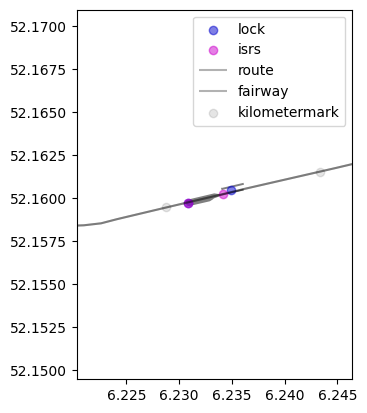

In [126]:
fig, ax = plt.subplots()
chambers.plot(ax=ax, color=(0, 0, 0, 0.5))

locks.plot(ax=ax, color=(0, 0, 0.8, 0.5), label='lock')
isrs_locks.plot(ax=ax, color=(0.8, 0, 0.8, 0.5), label='isrs')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
routes.plot(ax=ax, label='route', color=(0, 0, 0, 0.3))
fairways.plot(ax=ax, label='fairway', color=(0, 0, 0, 0.3))
kilometermarks.plot(ax=ax, label='kilometermark', color=(0, 0, 0, 0.1))
xlim = xlim[0] - 0.01, xlim[1] + 0.01
ylim = ylim[0] - 0.01, ylim[1] + 0.01
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.legend()

,Id,GeoType,GeoGeneration,Name,Geometry,ForeignCode,RouteId,RouteKmBegin,RouteKmEnd,FairwaySectionId,...,CountryCode,FairwayRouteId,Function,Hectometer,ObjectName,SectionNode,TerminalCode,UnLocationCode,PositionCode,geometry
812,40510,kilometermark,1707,kmr 47,POINT (6.82840941769783 52.2397439451329),None,11172,44.550,48.198,10303,...,NL,00081,dismar,470.0,47,2871.0,K0047,ENS,None,POINT (6.82841 52.23974)
813,40539,kilometermark,1707,kmr 37,POINT (6.68597326121707 52.2500333834379),None,11172,34.203,43.745,53172,...,NL,00081,dismar,369.0,37,2869.0,K0037,DEL,None,POINT (6.68597 52.25003)
835,47730,kilometermark,1707,kmr 39,POINT (6.71474115519147 52.2523389988998),None,11172,34.203,43.745,53172,...,NL,00081,dismar,390.0,39,2869.0,K0039,DEL,None,POINT (6.71474 52.25234)
1094,48197,kilometermark,1707,kmr 43,POINT (6.77293871960152 52.2496225973887),None,11172,34.203,43.745,53172,...,NL,00081,dismar,429.0,43,2869.0,K0043,HGL,None,POINT (6.77294 52.24962)
1141,41428,kilometermark,1707,kmr 44,POINT (6.78740022277612 52.2479652973849),None,11172,43.745,44.154,22000,...,NL,00081,dismar,440.0,44,2870.0,K0044,HGL,None,POINT (6.7874 52.24797)
1149,44663,kilometermark,1707,kmr 40,POINT (6.7290290310809 52.2520029858526),None,11172,34.203,43.745,53172,...,NL,00081,dismar,399.0,40,2869.0,K0040,HGL,None,POINT (6.72903 52.252)
1905,1961,kilometermark,1707,kmr 41,POINT (6.74385229164557 52.2514695611832),None,11172,34.203,43.745,53172,...,NL,00081,dismar,410.0,41,2869.0,K0041,HGL,None,POINT (6.74385 52.25147)
1972,5912,kilometermark,1707,kmr 46,POINT (6.8161923428933 52.2445000201821),None,11172,44.550,48.198,10303,...,NL,00081,dismar,460.0,46,2871.0,K0046,HGL,None,POINT (6.81619 52.2445)
2003,8805,kilometermark,1707,kmr 42,POINT (6.75845223086413 52.2509149390073),None,11172,34.203,43.745,53172,...,NL,00081,dismar,419.0,42,2869.0,K0042,HGL,None,POINT (6.75845 52.25091)
6308,15599,kilometermark,1707,kmr 36,POINT (6.67367982091772 52.2450699467149),None,11172,34.203,43.745,53172,...,NL,00081,dismar,359.0,36,2869.0,K0036,DEL,None,POINT (6.67368 52.24507)


2055